# Machine Learning Sentiment Analysis of Text Data Capstone Project example


## Sentiment Analysis of Text Data Example (Tweets)


## Import  Libraries

ERROR: Could not find a version that satisfies the requirement emoticons
ERROR: No matching distribution found for emoticons


In [1]:
!pip install plotly #plotly.py is an interactive, open-source, and browser-based graphing library for Python https://github.com/plotly/plotly.py

In [2]:
!pip install cufflinks #This library binds the power of plotly with the flexibility of pandas for easy plotting. https://github.com/santosjorge/cufflinks

In [434]:
import pandas as pd
import numpy as np
from collections import Counter
import nltk
import pandas as pd
import re as regex
import numpy as np
import plotly
from plotly import graph_objs
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
#plotly.offline.init_notebook_mode()

import seaborn as sns
import plotly
import cufflinks as cf
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/sphinx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Import the Data

In [435]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data.rename(columns={'Category': 'emotion'}, inplace=True)
test_data.rename(columns={'Category': 'Tweet'}, inplace=True)

train_data = train_data[train_data['emotion'] != 'Tweet']


In [436]:
train_data.head()

,Id,emotion,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [437]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5969 entries, 0 to 5969
Data columns (total 3 columns):
Id         5969 non-null object
emotion    5969 non-null object
Tweet      5969 non-null object
dtypes: object(3)
memory usage: 186.5+ KB


You might be tricked here, sometimes you need to remove **Not Available**

In [438]:
test_data.head()

,Id,Tweet
0,6.289494e+17,dear @Microsoft the newOoffice for Mac is grea...
1,6.289766e+17,@Microsoft how about you make a system that do...
2,6.290232e+17,Not Available
3,6.291792e+17,Not Available
4,6.291863e+17,If I make a game as a #windows10 Universal App...


# Data visualization

## Distribution of target class

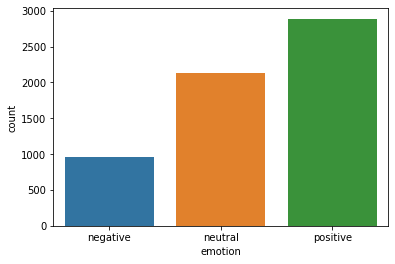

In [439]:
sns.countplot(x='emotion',data=train_data)

## Data Cleaning
One of mant techniques:

In [440]:
# remove the tweets which contains Not available

train_data = train_data[train_data['Tweet'] != "Not Available"]

### Some basic Function to clean our tweets
* Remove URLs
* Remove usernames (mentions)
* Remove tweets with Not Available text
* Remove special characters
* Remove numbers
* Remove anything you see not related!


In [441]:
def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    return tweet

* Apply function to Tweet column

In [442]:
train_data['Tweet'] = train_data['Tweet'].apply(clean_tweets)

* Remember the power of RegEx when you need it... 

In [443]:

text = 'text4 http://url.com/bla2/blah2'
re.sub(r"http\S+", "", text)
#text = '@ajay dkfhskf dfs'
#re.sub(r"@[^\s]+[\s]?",'',text)
#re.sub('[^ a-zA-Z0-9]', '', text)


'text4 '

In [444]:
train_data['Tweet'].head()

1    IOS  App Transport Security Mm need to check i...
2    Mar if you have an iOS device you should downl...
3    my phone does not run on latest IOS which may ...
4    Not sure how to start your publication on iOS ...
5    Two Dollar Tuesday is here with Forklift  Quic...
Name: Tweet, dtype: object

## Tokenization & stemming
* Note the difference between Tweet and word tokenize
* TweetTokenizer a subset of word tokenize meant to keeps hashtags and emotions expressions intact while word_tokenize doesn't.

### Tokenization

In [445]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize
tt = TweetTokenizer()
tweet = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <-- @remy: This is waaaaayyyy too much for you!!!!!!"
print(tt.tokenize(tweet))
print(word_tokenize(tweet))

['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3', 'and', 'some', 'arrows', '<', '>', '->', '<--', '@remy', ':', 'This', 'is', 'waaaaayyyy', 'too', 'much', 'for', 'you', '!', '!', '!']
['This', 'is', 'a', 'cooool', '#', 'dummysmiley', ':', ':', '-', ')', ':', '-P', '<', '3', 'and', 'some', 'arrows', '<', '>', '-', '>', '<', '--', '@', 'remy', ':', 'This', 'is', 'waaaaayyyy', 'too', 'much', 'for', 'you', '!', '!', '!', '!', '!', '!']


In [446]:
# Function which directly tokenize the tweet data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
train_data['Tweet'].apply(tt.tokenize)

1       [IOS, App, Transport, Security, Mm, need, to, ...
2       [Mar, if, you, have, an, iOS, device, you, sho...
3       [my, phone, does, not, run, on, latest, IOS, w...
4       [Not, sure, how, to, start, your, publication,...
5       [Two, Dollar, Tuesday, is, here, with, Forklif...
6       [If, youre, not, already, signed, up, to, test...
7       [YouTube, Gaming, Officially, Launches, On, We...
8       [YouTube, Gaming, Launches, Tomorrow, with, iO...
9       [Yashan, from, BBC, the, VPN, access, on, IOS,...
10      [Parkrun, app, for, iOS, downloaded, Where, ha...
11      [Today, launches, with, apps, for, iOS, and, A...
12      [Got, a, project, you, want, to, work, on, Nee...
13      [Met, with, iOS, Developer, today, We, may, ha...
14      [CrossSkyHigh, is, going, IOS, saturday, For, ...
15      [Whats, the, best, way, to, get, audio, record...
16      [Five, Great, Free, Apps, and, Games, for, iOS...
17      [looks, interesting, but, Ive, ALWAYS, ended, ...
18      [See, 

### Stemming
* Note that Stemmers remove morphological affixes from words, leaving only the word stem. 

In [447]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

The idea of stemming is a sort of normalizing method. Many variations of words carry the same meaning, other than when tense is involved.
The reason why we stem is to shorten the lookup, and normalize sentences.

Consider:
* I was taking a ride in the car.
* I was riding in the car.

This sentence means the same thing. in the car is the same. I was is the same. the ing denotes a clear past-tense in both cases, so is it truly necessary to differentiate between ride and riding, in the case of just trying to figure out the meaning of what this past-tense activity was?
No, not really.

This is just one minor example, but imagine every word in the English language, every possible tense and affix you can put on a word. Having individual dictionary entries per version would be highly redundant and inefficient, especially since, once we convert to numbers, the "value" is going to be identical.
One of the most popular stemming algorithms is the Porter stemmer, which has been around since 1979.

Let's grab and define our stemmer and hoose some words with a similar stem, like

In [448]:
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]
example_words = ["play","played","playing","player","pythonly"]

In [449]:
for w in example_words:
    print(ps.stem(w))

play
play
play
player
pythonli


#### Seperating tokenization and stemming is a good practice!

In [450]:
def tokenize(text):
    return word_tokenize(text)

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words

#### apply tokenize function

In [451]:
train_data['text'] = train_data['Tweet'].apply(tokenize)

#### apply steming function

In [452]:
train_data['tokenized'] = train_data['text'].apply(stemming)

In [453]:
train_data.head()

,Id,emotion,Tweet,text,tokenized
1,635930169241374720,neutral,IOS App Transport Security Mm need to check i...,"[IOS, App, Transport, Security, Mm, need, to, ...","[io, app, transport, secur, Mm, need, to, chec..."
2,635950258682523648,neutral,Mar if you have an iOS device you should downl...,"[Mar, if, you, have, an, iOS, device, you, sho...","[mar, if, you, have, an, io, devic, you, shoul..."
3,636030803433009153,negative,my phone does not run on latest IOS which may ...,"[my, phone, does, not, run, on, latest, IOS, w...","[my, phone, doe, not, run, on, latest, io, whi..."
4,636100906224848896,positive,Not sure how to start your publication on iOS ...,"[Not, sure, how, to, start, your, publication,...","[not, sure, how, to, start, your, public, on, ..."
5,636176272947744772,neutral,Two Dollar Tuesday is here with Forklift Quic...,"[Two, Dollar, Tuesday, is, here, with, Forklif...","[two, dollar, tuesday, is, here, with, forklif..."


In [454]:
len(train_data)

5421

## Wordlist

In [455]:
#NLTK Language Model Counter 
words = Counter()
for idx in train_data.index:
    words.update(train_data.loc[idx, "text"])

In [456]:
words.most_common(10)

[('the', 3960),
 ('to', 2466),
 ('a', 1591),
 ('on', 1518),
 ('I', 1496),
 ('and', 1393),
 ('in', 1384),
 ('of', 1249),
 ('is', 1133),
 ('for', 1095)]

##### Stop words

In [457]:
#corpus a text body 
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sphinx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* Lets check how many lang **nltk.corpus** can support:

In [458]:
#nltk.corpus.stopwords.fileids()

In [459]:
#stopwords

* Lets have our whiteList

In [460]:
whitelist = ["n't", "not"]
#whitelist = []
whitelist 

["n't", 'not']

In [461]:
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]
       # print(words[stop_word])
words.most_common(10)

[('I', 1496),
 ('may', 914),
 ('th', 671),
 ('tomorrow', 651),
 ('not', 372),
 ('st', 368),
 ('Im', 339),
 ('see', 316),
 ('The', 313),
 ('time', 310)]

In [462]:
def word_list(processed_data):
    #print(processed_data)
    min_occurrences=3 
    max_occurences=500 
    stopwords=nltk.corpus.stopwords.words("english")
    whitelist = ["n't","not"]
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
   # print(whitelist)
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "text"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlist.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    #print(wordlist)

In [463]:
word_list(train_data)

In [464]:
words = pd.read_csv("wordlist.csv")
words.head()

,idx,word,occurrences
0,0,not,372
1,1,st,368
2,2,Im,339
3,3,see,316
4,4,The,313


* How about you plot a WordMap

In [465]:
import matplotlib.pyplot as plt 
import seaborn as sns 




## Bag of Words Model

* A bag-of-words model, or BoW for short, is a way of extracting features from the text for use in modeling, such as with machine learning algorithms.
* The approach is very simple and flexible and can be used in a myriad of ways for extracting features from documents.
* The wordlist (dictionary) is build by simple count of occurences of every unique word across all of the training dataset.

In [467]:
import os

In [468]:
wordlist= []
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in train_data.index:
    current_row = []
    
    # add label
    current_label = train_data.loc[idx, "emotion"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(train_data.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)

bow = data_model  # Bag of words model

In [469]:
train_data.head()

,Id,emotion,Tweet,text,tokenized
1,635930169241374720,neutral,IOS App Transport Security Mm need to check i...,"[IOS, App, Transport, Security, Mm, need, to, ...","[io, app, transport, secur, Mm, need, to, chec..."
2,635950258682523648,neutral,Mar if you have an iOS device you should downl...,"[Mar, if, you, have, an, iOS, device, you, sho...","[mar, if, you, have, an, io, devic, you, shoul..."
3,636030803433009153,negative,my phone does not run on latest IOS which may ...,"[my, phone, does, not, run, on, latest, IOS, w...","[my, phone, doe, not, run, on, latest, io, whi..."
4,636100906224848896,positive,Not sure how to start your publication on iOS ...,"[Not, sure, how, to, start, your, publication,...","[not, sure, how, to, start, your, public, on, ..."
5,636176272947744772,neutral,Two Dollar Tuesday is here with Forklift Quic...,"[Two, Dollar, Tuesday, is, here, with, Forklif...","[two, dollar, tuesday, is, here, with, forklif..."


* Nicly emotion labled with every single word (2622 word)

In [470]:
words.head()

,idx,word,occurrences
0,0,not,372
1,1,st,368
2,2,Im,339
3,3,see,316
4,4,The,313


In [471]:
#wordlist

In [472]:
bow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Columns: 2622 entries, label to fiddle_bow
dtypes: int64(2621), object(1)
memory usage: 108.4+ MB


In [473]:
bow.head()

,label,not_bow,st_bow,Im_bow,see_bow,The_bow,time_bow,amp_bow,like_bow,going_bow,...,Prime_bow,Minister_bow,Alexis_bow,Hollande_bow,parliament_bow,Deadpool_bow,girlfriend_bow,Castle_bow,Cavani_bow,fiddle_bow
0,neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,negative,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [552]:
#words

In [555]:
#!pip install wordcloud

#### Lets visualize something

In [556]:
#wordCloud plot for most frequient words

In [474]:
import matplotlib.pyplot as plt 
import seaborn as sns 

* Most Freq words

Text(0.5, 1.0, 'Most frequent words ')

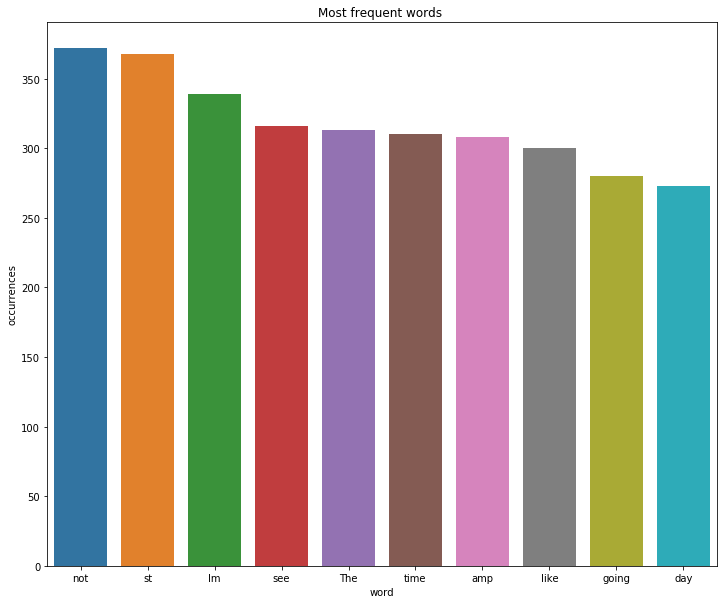

In [475]:
plt.figure(figsize=(12,10))
sns.barplot(x=words['word'][0:10],y=words['occurrences'][0:10])
plt.title(f'Most frequent words ')

* pick the emotion related to some word

Text(0.5, 1.0, 'Most frequent words ')

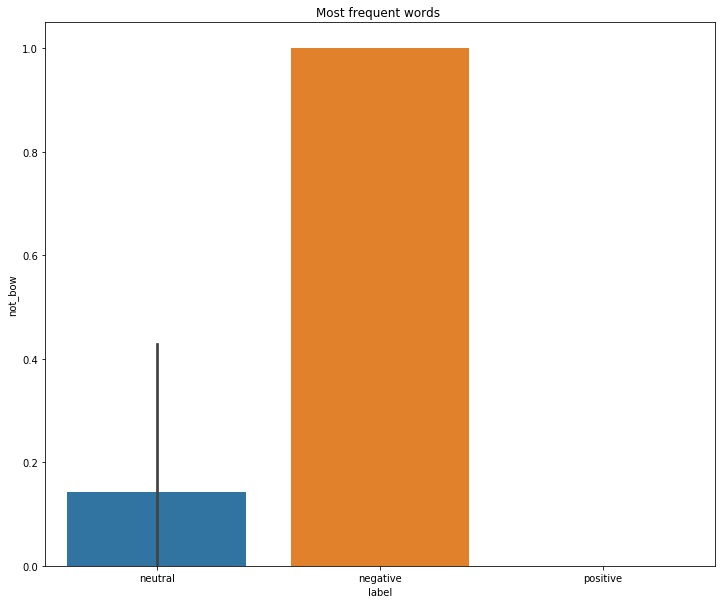

In [476]:
plt.figure(figsize=(12,10))
sns.barplot(x=bow['label'][0:10],y=bow['not_bow'][0:10])
plt.title(f'Most frequent words ')

In [478]:
bow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Columns: 2622 entries, label to fiddle_bow
dtypes: int64(2621), object(1)
memory usage: 108.4+ MB


## Classification

In [479]:
import random
seed = 777  # for RandomForestClassifier 
random.seed(seed)


#### Classifier test Fnc

In [480]:
def test_classifier(X_train, y_train, X_test, y_test, classifier):
    log("")
    log("---------------------------------------------------------")
    log("Testing " + str(type(classifier).__name__))
    now = time()
    list_of_labels = sorted(list(set(y_train)))
    model = classifier.fit(X_train, y_train)
    
    #Calculate learning time and provide logs 
    log("Learing time {0}s".format(time() - now))
    now = time()
    predictions = model.predict(X_test)
    log("Predicting time {0}s".format(time() - now))

    # Calculate Accuracy, Precision, recall
    
    precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    
    log("=================== Results ===================")
    log("            Negative     Neutral     Positive")
    log("F1       " + str(f1))
    log("Precision" + str(precision))
    log("Recall   " + str(recall))
    log("Accuracy " + str(accuracy))
    log("===============================================")

    return precision, recall, accuracy, f1

def log(x):
    #can be used to write to log file
    print(x)


## Experiment 1: BOW + Naive Bayes

In [481]:
bow.head()

,label,not_bow,st_bow,Im_bow,see_bow,The_bow,time_bow,amp_bow,like_bow,going_bow,...,Prime_bow,Minister_bow,Alexis_bow,Hollande_bow,parliament_bow,Deadpool_bow,girlfriend_bow,Castle_bow,Cavani_bow,fiddle_bow
0,neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,negative,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [482]:
bow.iloc[:, 1:].head()

,not_bow,st_bow,Im_bow,see_bow,The_bow,time_bow,amp_bow,like_bow,going_bow,day_bow,...,Prime_bow,Minister_bow,Alexis_bow,Hollande_bow,parliament_bow,Deadpool_bow,girlfriend_bow,Castle_bow,Cavani_bow,fiddle_bow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [483]:
bow['label'].head()

0     neutral
1     neutral
2    negative
3    positive
4     neutral
Name: label, dtype: object

In [484]:
bow['label'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

* Lets call the **test_classifier**

In [485]:
#train_test_split and BernoulliNB
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(bow.iloc[:, 1:], bow['label'], test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, BernoulliNB())


---------------------------------------------------------
Testing BernoulliNB
Learing time 0.21694278717041016s
Predicting time 0.07990479469299316s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.33255269 0.47161572 0.69322235]
Precision[0.44654088 0.49090909 0.63507625]
Recall   [0.26492537 0.45378151 0.76308901]
Accuracy 0.5679164105716041


In [486]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(data_model.drop(columns='label',axis=1),data_model['label'] , test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=seed,n_estimators=403,n_jobs=-1))



---------------------------------------------------------
Testing RandomForestClassifier
Learing time 8.726549863815308s
Predicting time 0.21590709686279297s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.28248588 0.4590459  0.69424259]
Precision[0.58139535 0.47486034 0.6185259 ]
Recall   [0.18656716 0.44425087 0.7910828 ]
Accuracy 0.5691456668715427


#### Crossvalidating Fnc for Classifier

In [487]:
def cv(classifier, X_train, y_train):
    log("===============================================")
    classifier_name = str(type(classifier).__name__)
    now = time()
    log("Crossvalidating " + classifier_name + "...")
    accuracy = [cross_val_score(classifier, X_train, y_train, cv=8, n_jobs=-1)]
    log("Crosvalidation completed in {0}s".format(time() - now))
    log("Accuracy: " + str(accuracy[0]))
    log("Average accuracy: " + str(np.array(accuracy[0]).mean()))
    log("===============================================")
    return accuracy

## Add Extra Features (keep special characters)

To run the extra feature function we have to re-add the data again because we have already removed the special charactrs and numbers.

In [488]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data.rename(columns={'Category': 'emotion'}, inplace=True)
test_data.rename(columns={'Category': 'emotion'}, inplace=True)

train_data = train_data[train_data['emotion'] != 'Tweet']
test_data = test_data[test_data['emotion'] != 'Tweet']

In [489]:
def add_extra_feature(df, tweet_column):
    
    # Print Number of Exclamation
    #length_of_excl = (len(re.findall(r'!', string)))
    df['number_of_exclamation'] = tweet_column.apply(lambda x: (len(re.findall(r'!', x))))
    
    # Number of ?
    #length_of_questionmark = (len(re.findall(r'?', string)))
    df['number_of_questionmark'] = tweet_column.apply(lambda x: (len(re.findall(r'[?]', x))))
    
    # Number of #
    df['number_of_hashtag'] = tweet_column.apply(lambda x: (len(re.findall(r'#', x))))
    
    # Number of @
    df['number_of_mention'] = tweet_column.apply(lambda x: (len(re.findall(r'@', x))))
    
    # Number of Quotes
    df['number_of_quotes'] = tweet_column.apply(lambda x: (len(re.findall(r"'", x))))

    # Number if underscore
    df['number_of_underscore'] = tweet_column.apply(lambda x: (len(re.findall(r'_', x))))
    
    
    #print((txt.split(" "), row))
    #print(row.split())

In [490]:
# pass the train_data into add_extra_feature function
add_extra_feature(train_data, train_data["Tweet"])


## ADD EMOTICONS

Here, users emoticons in a tweet also matters, so we will find the emoticons in a users tweet.

In [491]:
## Emoticon Detector class

class EmoticonDetector:
    emoticons = {}

    def __init__(self, emoticon_file="data/emoticons.txt"):
        from pathlib import Path # Object-oriented filesystem paths
        content = Path(emoticon_file).read_text()
        positive = True
        for line in content.split("\n"):
            if "positive" in line.lower():
                positive = True
                continue
            elif "negative" in line.lower():
                positive = False
                continue

            self.emoticons[line] = positive

    def is_positive(self, emoticon):
        if emoticon in self.emoticons:
            return self.emoticons[emoticon]
        return False

    def is_emoticon(self, to_check):
        return to_check in self.emoticons

In [492]:
ed = EmoticonDetector()

In [493]:
processed_data = train_data.copy()

def add_column(column_name, column_content):
    processed_data.loc[:, column_name] = pd.Series(column_content, index=processed_data.index)

def count_by_lambda(expression, word_array):
    return len(list(filter(expression, word_array)))

add_column("splitted_text", map(lambda txt: txt.split(" "), processed_data["Tweet"]))

positive_emo = list(
    map(lambda txt: count_by_lambda(lambda word: ed.is_emoticon(word) and ed.is_positive(word), txt),
        processed_data["splitted_text"]))
add_column("number_of_positive_emo", positive_emo)

negative_emo = list(map(
    lambda txt: count_by_lambda(lambda word: ed.is_emoticon(word) and not ed.is_positive(word), txt),
    processed_data["splitted_text"]))

add_column("number_of_negative_emo", negative_emo)

In [494]:
processed_data .head()

,Id,emotion,Tweet,number_of_exclamation,number_of_questionmark,number_of_hashtag,number_of_mention,number_of_quotes,number_of_underscore,splitted_text,number_of_positive_emo,number_of_negative_emo
0,635769805279248384,negative,Not Available,0,0,0,0,0,0,"[Not, Available]",0,0
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,0,0,0,0,0,0,"[IOS, 9, App, Transport, Security., Mm, need, ...",0,0
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",0,0,0,0,0,0,"[Mar, if, you, have, an, iOS, device,, you, sh...",0,0
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,0,0,0,1,0,1,"[@jimmie_vanagon, my, phone, does, not, run, o...",0,0
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0,1,0,0,1,0,"[Not, sure, how, to, start, your, publication,...",0,0


In [498]:
train_data.head()

,Id,emotion,Tweet,number_of_exclamation,number_of_questionmark,number_of_hashtag,number_of_mention,number_of_quotes,number_of_underscore,number_of_positive_emo,number_of_negative_emo
0,635769805279248384,negative,Not Available,0,0,0,0,0,0,0,0
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,0,0,0,0,0,0,0,0
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",0,0,0,0,0,0,0,0
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,0,0,0,1,0,1,0,0
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0,1,0,0,1,0,0,0


In [495]:
train_data['number_of_positive_emo'] = positive_emo
train_data['number_of_negative_emo'] = negative_emo

## WHY EXTRA FEATURES

Let's see how (some) of the extra features distribute the data set. Some of them, i.e 
* number of exclamation marks, 
* number of pos/neg emoticons 

do this surprisingly well. Notwithstanding the good severance, those features seldom transpire only on a small subset of the training dataset.

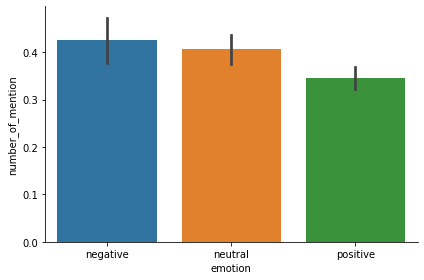

In [497]:
sns.barplot(x='emotion', y='number_of_mention', data=train_data)
sns.despine()
plt.tight_layout()

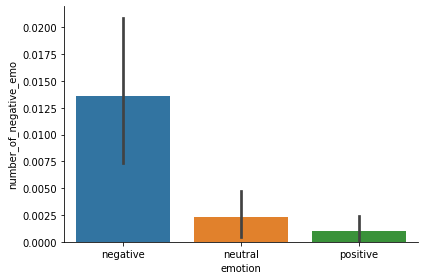

In [499]:
sns.barplot(x='emotion', y='number_of_negative_emo', data=train_data)
sns.despine()
plt.tight_layout()

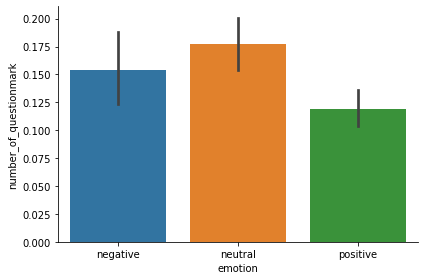

In [500]:
sns.barplot(x='emotion', y='number_of_questionmark', data=train_data)
sns.despine()
plt.tight_layout()

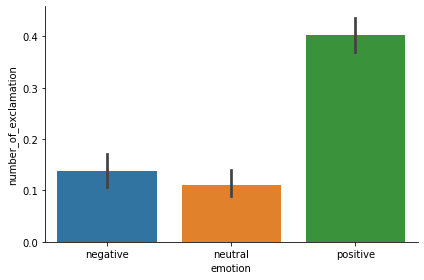

In [501]:
sns.barplot(x='emotion', y='number_of_exclamation', data=train_data)
sns.despine()
plt.tight_layout()

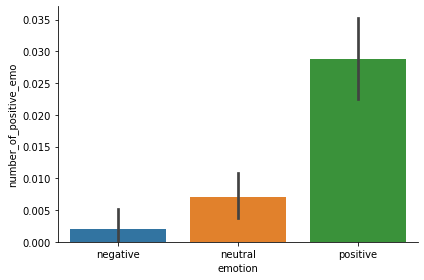

In [502]:
sns.barplot(x='emotion', y='number_of_positive_emo', data=train_data)
sns.despine()
plt.tight_layout()

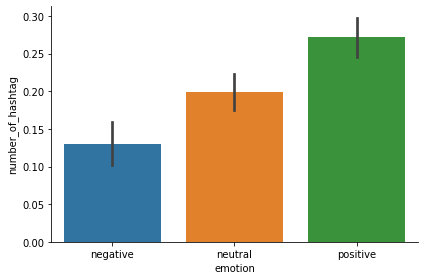

In [503]:
sns.barplot(x='emotion', y='number_of_hashtag', data=train_data)
sns.despine()
plt.tight_layout()

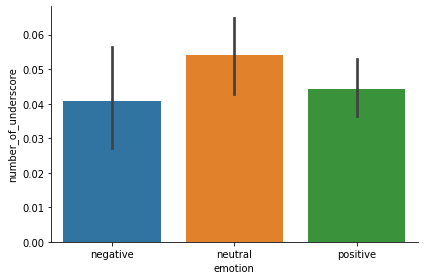

In [504]:
sns.barplot(x='emotion', y='number_of_underscore', data=train_data)
sns.despine()
plt.tight_layout()

## Preapre training data for model

In [505]:
train_data.head()

,Id,emotion,Tweet,number_of_exclamation,number_of_questionmark,number_of_hashtag,number_of_mention,number_of_quotes,number_of_underscore,number_of_positive_emo,number_of_negative_emo
0,635769805279248384,negative,Not Available,0,0,0,0,0,0,0,0
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,0,0,0,0,0,0,0,0
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",0,0,0,0,0,0,0,0
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,0,0,0,1,0,1,0,0
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,0,1,0,0,1,0,0,0


In [512]:
# apply the clean tweet function
train_data['Tweet'] = train_data['Tweet'].apply(clean_tweets)

In [513]:
## Tokenize data
train_data['text'] = train_data['Tweet'].apply(tokenize)
train_data['tokenized'] = train_data['text'].apply(stemming)

In [520]:
## BAG OF WORDS
wordlist= []
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in train_data.index:
    current_row = []
        # add label
    current_label = train_data.loc[idx, "emotion"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(train_data.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)



In [521]:
dat1 = train_data
dat2 = data_model

dat1 = dat1.reset_index(drop=True)
dat2 = dat2.reset_index(drop=True)

data_model = dat1.join(dat2)

In [522]:
train_data.columns

Index(['Id', 'emotion', 'Tweet', 'number_of_exclamation',
       'number_of_questionmark', 'number_of_hashtag', 'number_of_mention',
       'number_of_quotes', 'number_of_underscore', 'number_of_positive_emo',
       'number_of_negative_emo', 'text', 'tokenized'],
      dtype='object')

In [523]:
## Drop the columns in data_model
data_model = data_model.drop(columns=['emotion','Tweet','text', 'tokenized','Id'], axis=1)

## Experiment 2: Added feature + Random Forest

In [524]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(data_model.drop(columns='label',axis=1),data_model['label'] , test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=seed,n_estimators=403,n_jobs=-1))



---------------------------------------------------------
Testing RandomForestClassifier
Learing time 8.113479137420654s
Predicting time 0.22267484664916992s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.19895288 0.4544     0.69230769]
Precision[0.57575758 0.44724409 0.61926606]
Recall   [0.12025316 0.46178862 0.78488372]
Accuracy 0.5566722501395869


In [525]:
rf_acc = cv(RandomForestClassifier(n_estimators=403,n_jobs=-1, random_state=seed),data_model.drop(columns='label',axis=1), data_model['label'])

Crossvalidating RandomForestClassifier...
Crosvalidation completed in 113.88454985618591s
Accuracy: [0.53815261 0.51807229 0.40963855 0.30254351 0.39812332 0.51006711
 0.53288591 0.53959732]
Average accuracy: 0.46863507764316226


## Experiment 3: Added Feature + XGBoost

In [526]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 7.9 MB/s eta 0:00:01


In [528]:
from xgboost import XGBClassifier as XGBoostClassifier

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/sphinx/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/sphinx/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [529]:
X_train, X_test, y_train, y_test = train_test_split(data_model.drop(columns='label',axis=1),data_model['label'] , test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, XGBoostClassifier(seed=seed))

NameError: name 'XGBoostClassifier' is not defined

## Experiment 4: Added Feature + Naive Bayes

In [530]:
X_train, X_test, y_train, y_test = train_test_split(data_model.drop(columns='label',axis=1),data_model['label'] , test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, BernoulliNB())


---------------------------------------------------------
Testing BernoulliNB
Learing time 0.25191617012023926s
Predicting time 0.0952451229095459s
=================== Results ===================
            Negative     Neutral     Positive
F1       [0.32608696 0.43500425 0.68997429]
Precision[0.38659794 0.48393195 0.62827715]
Recall   [0.28195489 0.39506173 0.76510832]
Accuracy 0.559463986599665


## Test Data

In [531]:
test_data.head()

,Id,emotion
0,6.289494e+17,dear @Microsoft the newOoffice for Mac is grea...
1,6.289766e+17,@Microsoft how about you make a system that do...
2,6.290232e+17,Not Available
3,6.291792e+17,Not Available
4,6.291863e+17,If I make a game as a #windows10 Universal App...


In [532]:
test_data.columns

Index(['Id', 'emotion'], dtype='object')

In [533]:
# remove the tweets which contains Not available
test_data = test_data.rename(columns={"emotion": "Tweet"})
test_data = test_data[test_data['Tweet'] != "Not Available"]

In [534]:

# Drop null values
test_data = test_data.dropna() 

# add extra features
add_extra_feature(test_data, test_data['Tweet'])

# Clean tweets
test_data['Tweet'] = test_data['Tweet'].apply(clean_tweets)

## Tokenize data
test_data['text'] = test_data['Tweet'].apply(tokenize)
test_data['tokenized'] = test_data['text'].apply(stemming)

In [535]:
# wordlist
word_list(test_data)

In [536]:
## BAG OF WORDS
wordlist= []
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in test_data.index:
    current_row = []
        # add label
    current_label = test_data.loc[idx, "Tweet"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(test_data.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)



In [537]:
dat1 = test_data
dat2 = data_model

dat1 = dat1.reset_index(drop=True)
dat2 = dat2.reset_index(drop=True)

data_model = dat1.join(dat2)

In [538]:
test_model = pd.DataFrame()
test_model['original_id'] = data_model['Id']

In [539]:
data_model = data_model.drop(columns=['Tweet','text', 'tokenized','Id'], axis=1)

In [540]:
from sklearn.ensemble import RandomForestClassifier

In [541]:
RF = RandomForestClassifier(n_estimators=403,max_depth=10)

In [542]:
RF.fit(data_model.drop(columns='label',axis=1),data_model['label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=403,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [543]:
predictions = RF.predict(data_model.drop(columns='label',axis=1))

In [544]:
results = pd.DataFrame([],columns=["Id","Category"])
results["Id"] = test_model["original_id"].astype("int64")
results["Category"] = predictions
results.to_csv("results_xgb.csv",index=False)

In [545]:
results

,Id,Category
0,628949369883000832,dear the newOoffice for Mac is great and all b...
1,628976607420645376,how about you make a system that doesnt eat my...
2,629186282179153920,If I make a game as a windows Universal App Wi...
3,629226490152914944,Microsoft I may not prefer your gaming branch ...
4,629345637155360768,I will be downgrading and let Windows be out f...
5,629394528336637952,nd computer with same error Windowsfail Guess ...
6,629650766580609024,Just ordered my st ever tablet Surface Pro iG...
7,629797991826722816,After attempting a reinstall it still bricks s...
8,630159517058142208,Bernie Sanders is about to torpedo any chance ...
9,630542330827771904,Did break Windows Was working fine on Wednesd...


### Conclusion
The increase of microblogging sites like Twitter offers an unparalleled opening to form and employ approaches & technologies that search and mine for sentiments. The work presented in this paper specifies an approach for sentiment analysis on Twitter data. To unseal the sentiment, we extracted the relevant data from the tweets, added the features.
The overall tweet sentiment was then calculated using a model that presented in this report. This work is exploratory in nature and the prototype evaluated is a preliminary prototype. 
The models showed that prediction of text sentiment is a non-trivial task for machine learning. A lot of preprocessing is needed just to be able to run an algorithm. The main problem for sentiment analysis is to craft the machine representation of the text. Simple bag-of-words was definitely not enough to obtain satisfying results, thus a lot of additional features were created basing on common sense (number of emoticons, exclamation marks, number of question mark etc). I think that a slight improvement in classification accuracy for the given training dataset could be developed, but since it included highly skewed data (small number of negative cases), the difference will be probably in the order of a few percents. The thing that could possibly enhance classification outcomes will be to add a lot of additional examples (increase training dataset), because given 5971 examples clearly do not include all sequence of words used, further - a lot of emotion-expressing information certainly is missing.